# PreProcessing

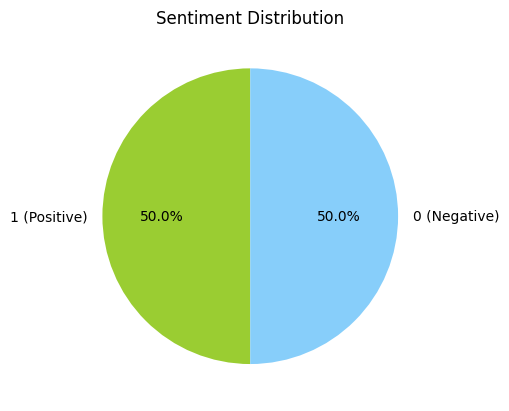

x_train shape: (16000, 200)
x_test shape: (4000, 200)


In [17]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from tf_keras.preprocessing.text import Tokenizer
from tf_keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/Reviews.csv')
df = df[['Text', 'Score']]
df.rename(columns={'Text': 'review', 'Score': 'label'}, inplace=True)

df = df[df['label'] != 3]

df['label'] = df['label'].apply(lambda rating: 1 if rating > 3 else 0)

df.dropna(subset=['review'], inplace=True)
df.drop_duplicates(subset=['review', 'label'], keep='first', inplace=True)

pos_df = df[df.label == 1][:10000]
neg_df = df[df.label == 0][:10000]
df = pd.concat([pos_df, neg_df], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

plt.pie(df.label.value_counts(), labels=["1 (Positive)", "0 (Negative)"],
        colors=["yellowgreen", "lightskyblue"], startangle=90, autopct='%.1f%%')
plt.title("Sentiment Distribution")
plt.show()

df['review'] = df['review'].apply(lambda x: x.lower())
df['review'] = df['review'].apply(lambda x: re.sub(r'\d+', '', x))
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
df['review'] = df['review'].apply(lambda x: x.strip())

x = df['review']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

max_review_length = 200
vocab_size = len(tokenizer.word_index) + 1

x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

# Model Training 1

Epoch 1/5
24/24 [==============================] - 24s 885ms/step - loss: 0.5270 - accuracy: 0.8245 - val_loss: 0.4374 - val_accuracy: 0.8375
Epoch 2/5
24/24 [==============================] - 28s 1s/step - loss: 0.4222 - accuracy: 0.8372 - val_loss: 0.4074 - val_accuracy: 0.8375
Epoch 3/5
24/24 [==============================] - 25s 1s/step - loss: 0.3546 - accuracy: 0.8444 - val_loss: 0.3346 - val_accuracy: 0.8569
Epoch 4/5
24/24 [==============================] - 21s 876ms/step - loss: 0.2544 - accuracy: 0.8860 - val_loss: 0.2817 - val_accuracy: 0.8910
Epoch 5/5
24/24 [==============================] - 18s 747ms/step - loss: 0.1836 - accuracy: 0.9317 - val_loss: 0.3063 - val_accuracy: 0.8916
Test Score: 0.3062988817691803
Test Accuracy: 0.8916388154029846
Accuracy: 89.16%
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


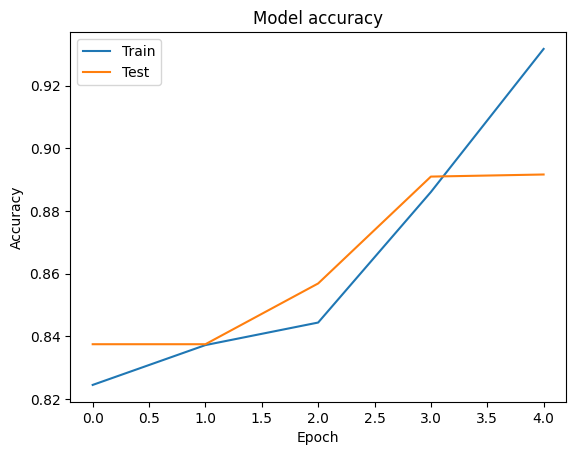

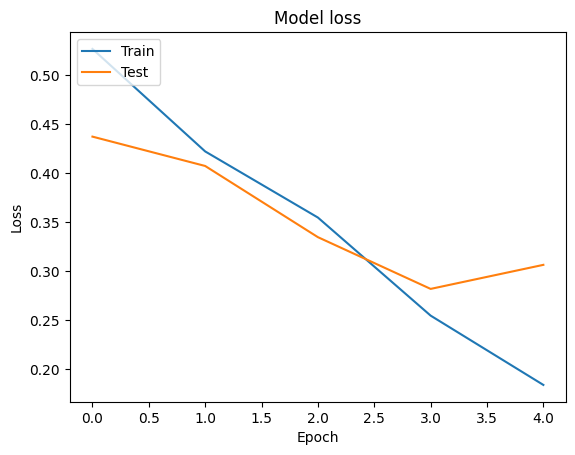

In [14]:
import matplotlib.pyplot as plt
from tf_keras.models import Sequential
from tf_keras.layers import Embedding, LSTM, Dense

# Build Model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length =max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=256, epochs=5)
result = model.evaluate(x_test, y_test, verbose=0)
#Results
print("Test Score:", result[0])
print("Test Accuracy:", result[1])
print("Accuracy: %.2f%%" % (result[1]*100))

#plot_results
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model training 2

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 52s 509ms/step - accuracy: 0.4863 - loss: 0.6933 - val_accuracy: 0.5420 - val_loss: 0.6928
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 86s 557ms/step - accuracy: 0.5361 - loss: 0.6929 - val_accuracy: 0.6115 - val_loss: 0.6923
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 504ms/step - accuracy: 0.5986 - loss: 0.6924 - val_accuracy: 0.6544 - val_loss: 0.6917
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 46s 502ms/step - accuracy: 0.6415 - loss: 0.6918 - val_accuracy: 0.6731 - val_loss: 0.6912
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 505ms/step - accuracy: 0.6536 - loss: 0.6914 - val_accuracy: 0.6857 - val_loss: 0.6906
Test Score: 0.6906144618988037
Test Accuracy: 0.6857337355613708
Accuracy: 68.57%
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


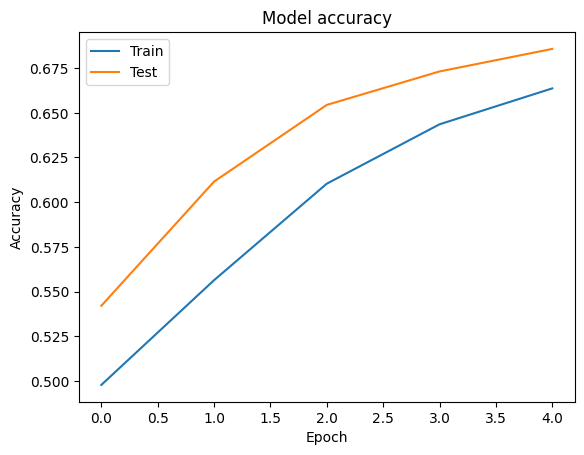

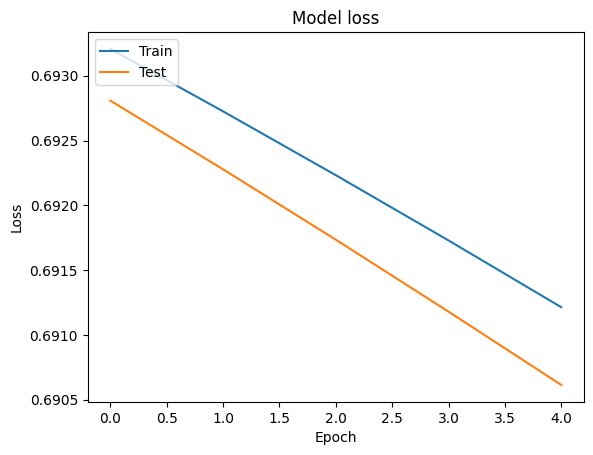

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build Model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length =max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=5)
result = model.evaluate(x_test, y_test, verbose=0)
#Results
print("Test Score:", result[0])
print("Test Accuracy:", result[1])
print("Accuracy: %.2f%%" % (result[1]*100))

# plot_results
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model Training 3


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 60s 460ms/step - accuracy: 0.6287 - loss: 0.6214 - val_accuracy: 0.8585 - val_loss: 0.3356
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 490ms/step - accuracy: 0.8938 - loss: 0.2746 - val_accuracy: 0.8815 - val_loss: 0.2870
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 77s 458ms/step - accuracy: 0.9189 - loss: 0.2192 - val_accuracy: 0.8850 - val_loss: 0.2965
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 87s 496ms/step - accuracy: 0.9404 - loss: 0.1702 - val_accuracy: 0.8770 - val_loss: 0.3065
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 77s 456ms/step - accuracy: 0.9391 - loss: 0.1659 - val_accuracy: 0.8615 - val_loss: 0.3420
Test Score: 0.34204450249671936
Test Accuracy: 0.8615000247955322
Accuracy: 86.15%
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


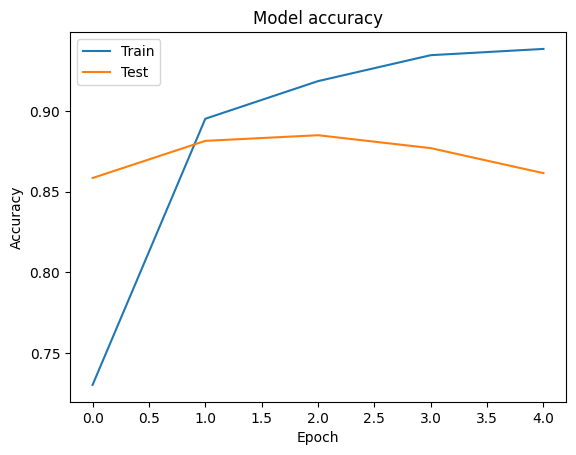

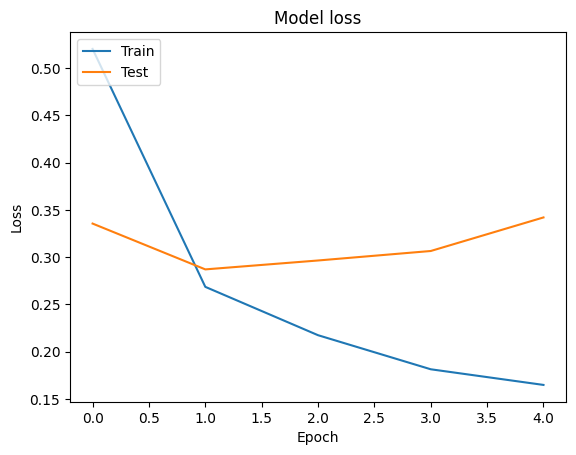

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
# Build Model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length =max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=5)
result = model.evaluate(x_test, y_test, verbose=0)
#Results
print("Test Score:", result[0])
print("Test Accuracy:", result[1])
print("Accuracy: %.2f%%" % (result[1]*100))

#plot result
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()